In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import fabs

In [38]:
width, length = 3, 3

In [39]:
counter = 1
nodes = [i for i in range(1, width * length + 1)]
positions = {}

connections = []
borders = []
inside = []

In [40]:
for i in range(width):
    for j in range(length):
        positions[counter] = (i, j)
        if (i in [0, width - 1]) or (j in [0, length - 1]):
            borders.append((i, j))
        counter += 1

In [41]:
revesred_positions = {pos: node for node, pos in positions.items()}

In [42]:
for pos in positions.values():
    if pos not in borders:
        inside.append(pos)

In [43]:
for insider in inside:
    for (r, c) in positions.values():
        if (r == insider[0]) & (fabs(c - insider[1]) == 1):
            connections.append((revesred_positions[insider], revesred_positions[(r, c)]))
        elif (c == insider[1]) & (fabs(r - insider[0]) == 1):
            connections.append((revesred_positions[insider], revesred_positions[(r, c)]))

In [44]:
for index, (r1, c1) in enumerate(borders):
    for index2, (r2, c2) in enumerate(borders[index:]):

        if (r1, c1) != (r2, c2):

            if (r1 == r2) & (fabs(c1 - c2) == 1):
                connections.append((revesred_positions[(r1, c1)], revesred_positions[(r2, c2)]))

            elif (c1 == c2) & (fabs(r1 - r2) == 1):
                connections.append((revesred_positions[(r1, c1)], revesred_positions[(r2, c2)]))

        # print(f"{(r1, c1)} - {(r2, c2)}")

    # if index == len(borders) - 1:
    #     start, end = borders[index], borders[0]
    # else:
    #     start, end = borders[index], borders[index + 1]
        
    # connections.append((revesred_positions[start], revesred_positions[end]))

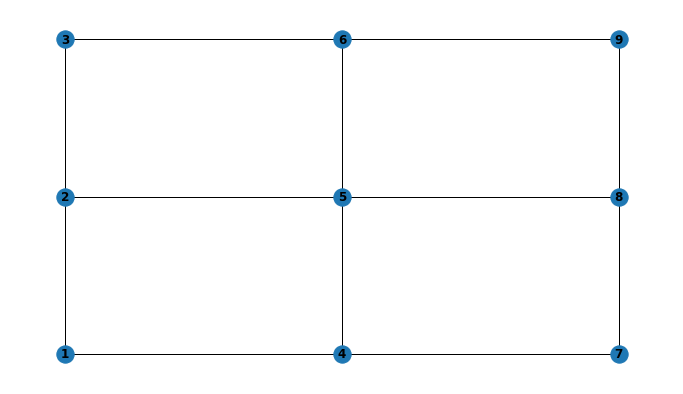

In [45]:
fig, axes = plt.subplots(figsize=(12, 7))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(connections)
nx.draw(G, positions, with_labels=True, font_weight='bold', ax=axes)
plt.show()